# Medical Cost Insurance

Linear Regression Model

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read csv file
data = pd.read_csv('medical_cost_insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Checking for missing values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

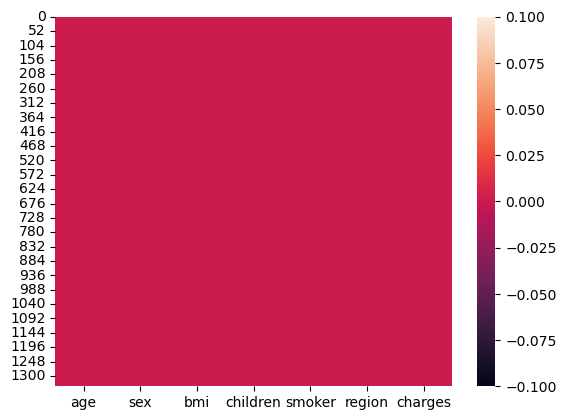

In [9]:
#lets visualise it
sns.heatmap(data.isnull())

Observations :

we can clearly visualize there is no missing values in the dataset.

# Duplicate Values

In [11]:
#Checking duplicate values
data.duplicated().sum()

1

In [12]:
#dropping duplicated Values
data.drop_duplicates(inplace=True)

#checking Duplicated Values again
data.duplicated().sum()

0

In [13]:
#checking dimension of data after removing duplicate values
data.shape

(1337, 7)

In [14]:
data.nunique().to_frame("No. of Unique Values in Each column")

,No. of Unique Values in Each column
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [15]:
#checking unique values in target Column
data["charges"].value_counts()

16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

Observation : We can clearly visialize that our target variable has 1337 unique values which equal to the number of rows in our dataframe, it will be termed as "Regression problem" where we need to predict the health insurance costs using the regression model.

# Column Types:

In [16]:
num_colmn = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns in our dataset :\n", num_colmn,"\n")

cat_column = data.select_dtypes(include=['object']).columns
print("categorical columns in our dataset :\n", cat_column)

Numerical columns in our dataset :
 Index(['age', 'bmi', 'children', 'charges'], dtype='object') 

categorical columns in our dataset :
 Index(['sex', 'smoker', 'region'], dtype='object')


Observations: These are the numerical and categorical columns in our set.

In [17]:
#description of data in categorical columns:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Observation:

'age' column does not appear to be significantly skewed. It is approximately symmetric or very close to being normally distributed.
mean of 'BMI' (30.66) is somewhat closer to the 75th percentile (34.70) than the 25th percentile (26.29). This suggests a slightly right-skewed distribution, where the tail of the distribution extends more to the right.
mean number of 'children'(1.10) is closer to the 75th percentile (2.00) than the 25th percentile (0.00). This also indicates a right-skewed distribution, where more individuals have a higher number of dependents.

In [18]:
#description of data in categorical columns:
data.describe(include=['object'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


# Lets visualize the distribution of data in thecolumns

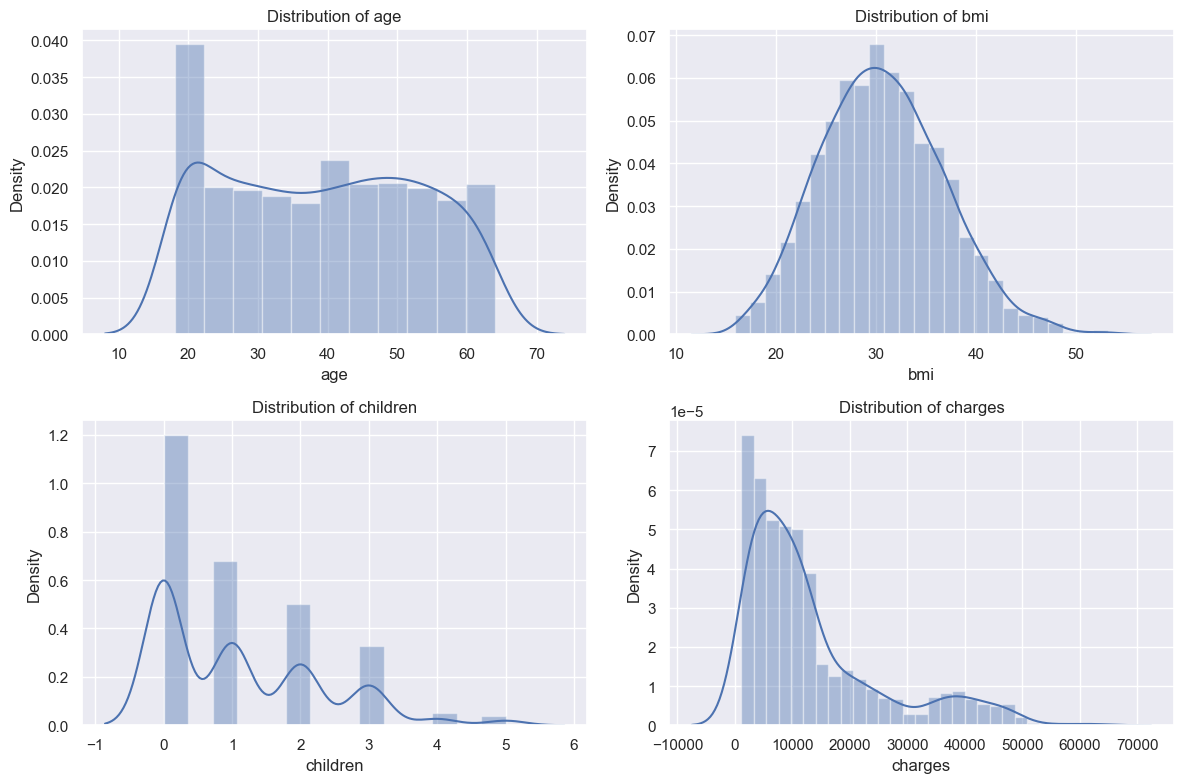

In [20]:
# Numerical Columns
plt.figure(figsize=(12, 8))
p=1
for column in num_colmn:
    sns.set()
    # Adjust the subplot size within the figure
    plt.subplot(2,2,p)
    sns.distplot(data[column])
    plt.title(f'Distribution of {column}')
    p += 1
plt.tight_layout()
plt.show()

Observations :

Age: As we know we have 47 unique values in our dataset and Maximum people are in age between 20-25
BMI : Normal BMi is ideally 18.5 to 24.9 however, in our dataset we can see maximum occurances in between 24.9 to 35 approx
Children: In out dataset Maximum number of people don't have children. We can visualize that data is showing skewness. However, we wont remove it at is belongs to categorical data
Charges : It is our target column, it contains 1337 unique values, and maximum people are getting 1000-17000

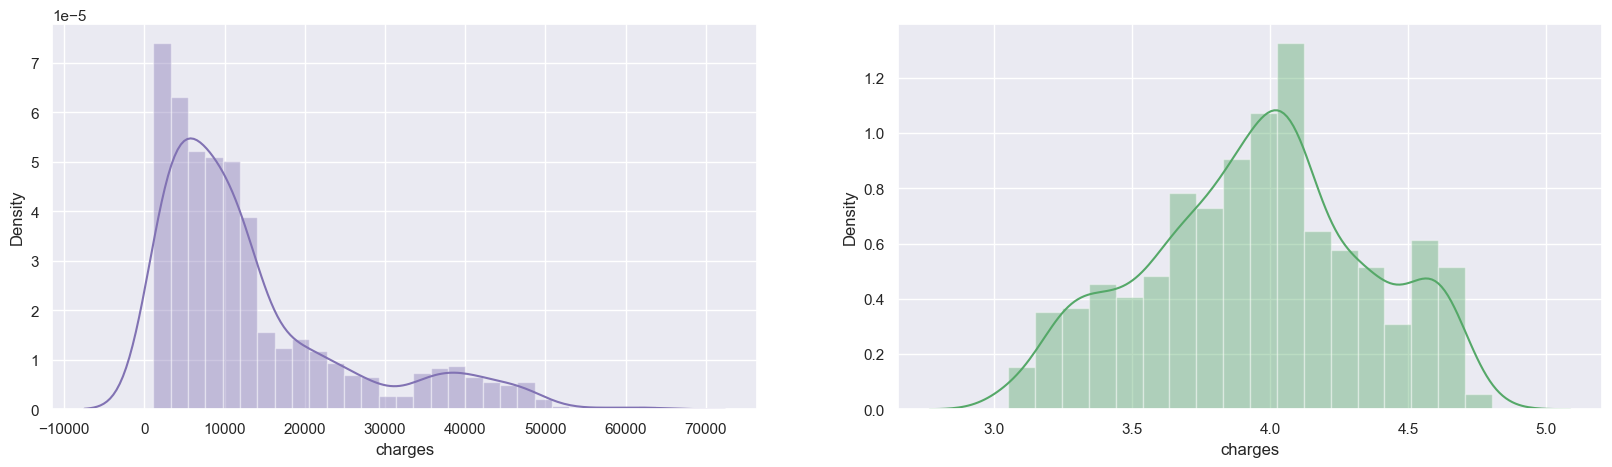

In [21]:
#Handling Distribution of Charges

# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(data.charges, color = 'm')

# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(data.charges), color = 'g')
plt.show()

# Observations : The distribution of charges exhibits right-skewness, prompting us to apply the natural logarithm transformation to approximate a more normal distribution.

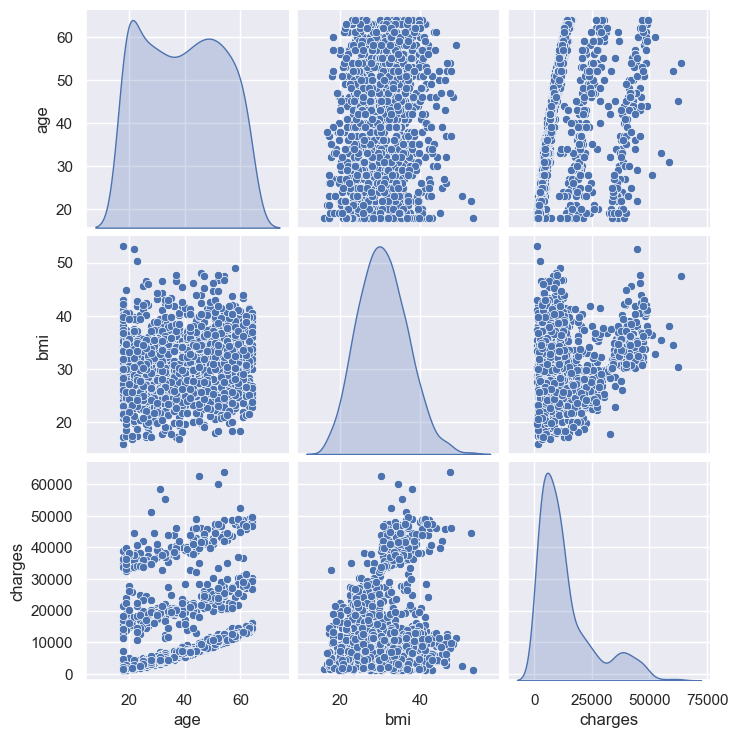

In [22]:
# Pairplot for Age, BMI, Charges
numerical_data = data[num_colmn]

# Remove the 'children' column from numerical_df
numerical_data.drop('children', axis=1, inplace=True)

sns.pairplot(numerical_data, diag_kind = 'kde')
plt.show()

Observations: The pairplot indicates the presence of a linear relationship between age and BMI with respect to charges.

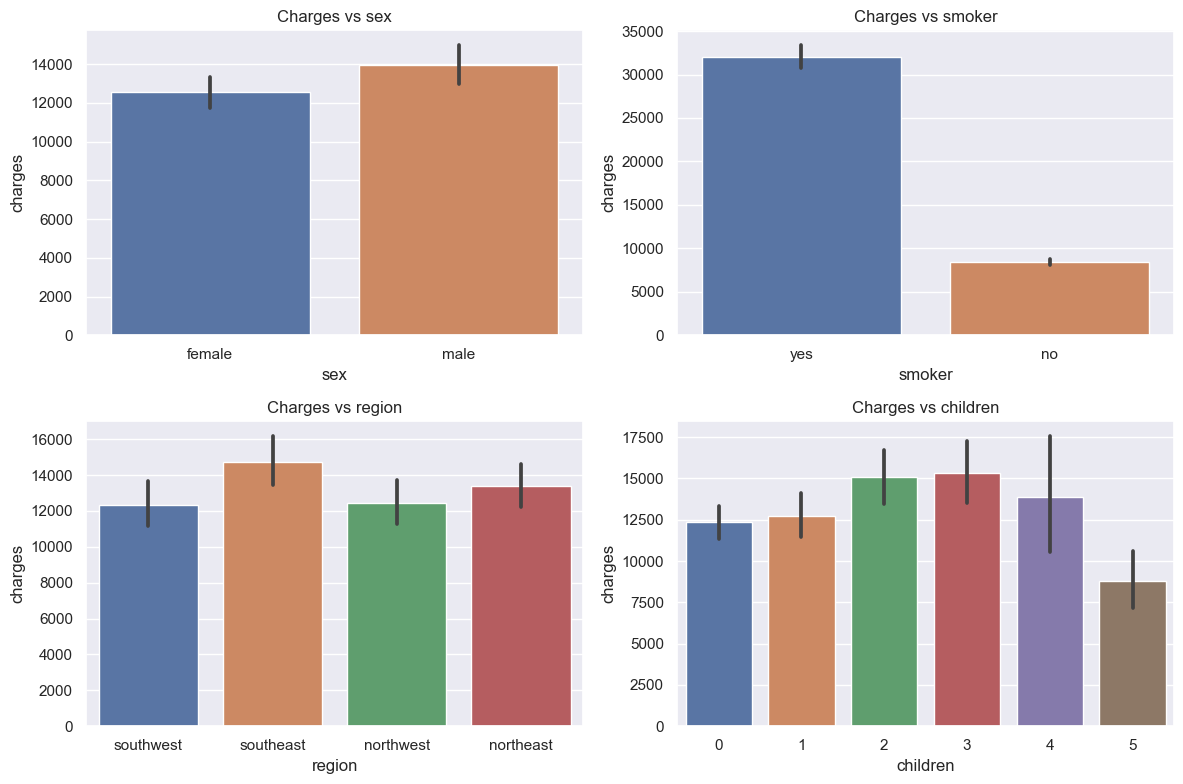

In [23]:
#Adding children variable in categorical column
cat_column = cat_column.append(pd.Index(['children']))

#Create a DataFrame containing the selected categorical columns
cat_data = data[cat_column]

p = 1
plt.figure(figsize=(12, 8))

for column in cat_data:
    sns.set()
    if p <= 4:
        plt.subplot(2, 2, p)
        sns.barplot(x=column, y='charges', data=data)
        plt.title(f'Charges vs {column}')
        p += 1

plt.tight_layout()
plt.show()

Observations :

Sex: The data is bit baised towards male than women in the dataset.
Smoker: Ration of smoker is higher than non smoker in our dataset.And we can clearly visualise smokers medical charges is higher than non smokers.
Region: We can notice southeast region are paying higher than other 3 regions.
Children: Here cam see people with 2 and 3 children than the people with 0,1,4 and 5 respectively.
For a deeper understanding, let's explore how the combination of factors collectively impacts medical charges.

# Bivariate Analysis

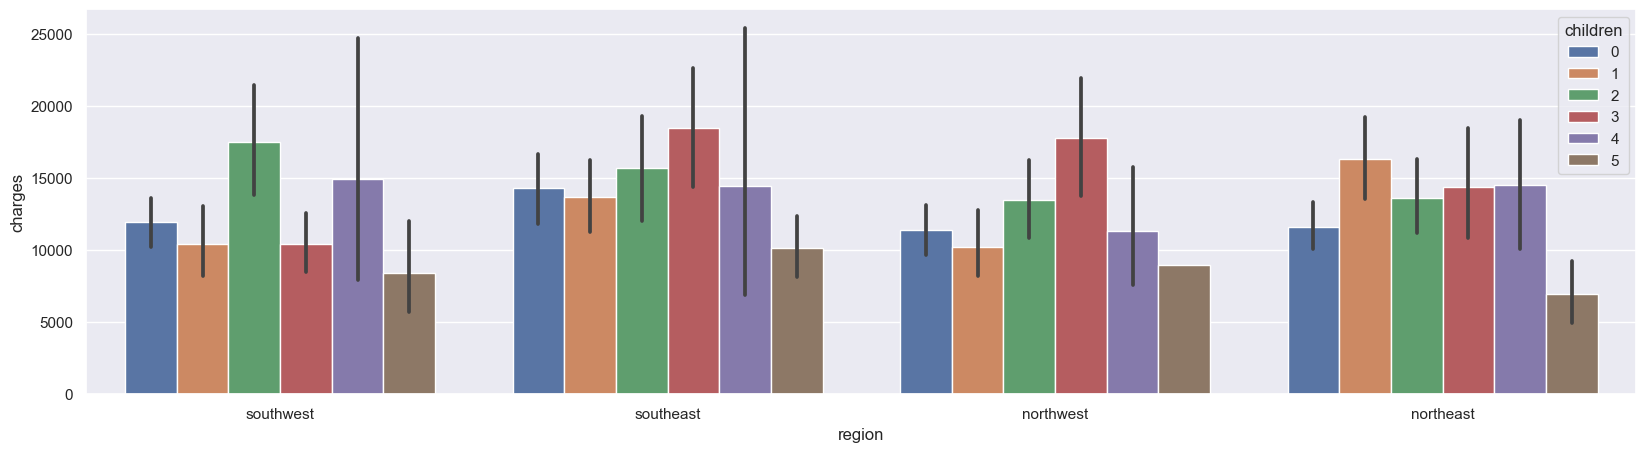

In [24]:
# Setting children as hue parameter
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = data)

Observations :

It appears that there is no statistically significant difference in how the number of children in a specific region impacts medical charges.

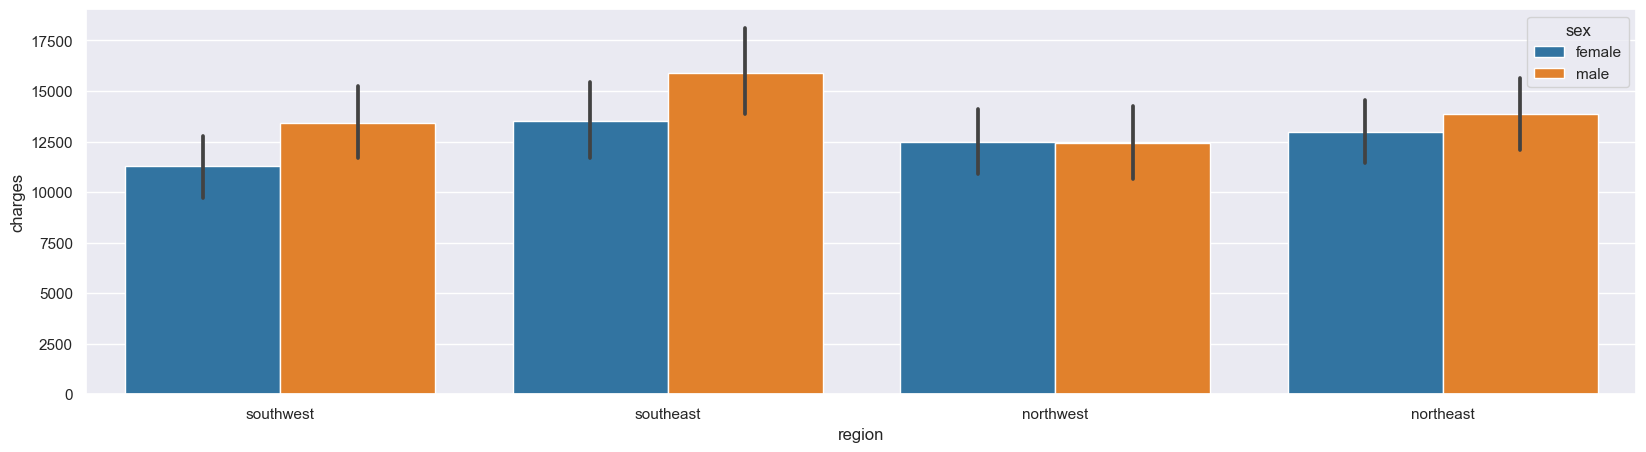

In [25]:
# setting Sex as Hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = data, palette = 'tab10')
plt.show()

Observations :

Once again, similar to the previous graph, there doesn't appear to be a statistically significant difference in how gender within a specific region affects medical charges.

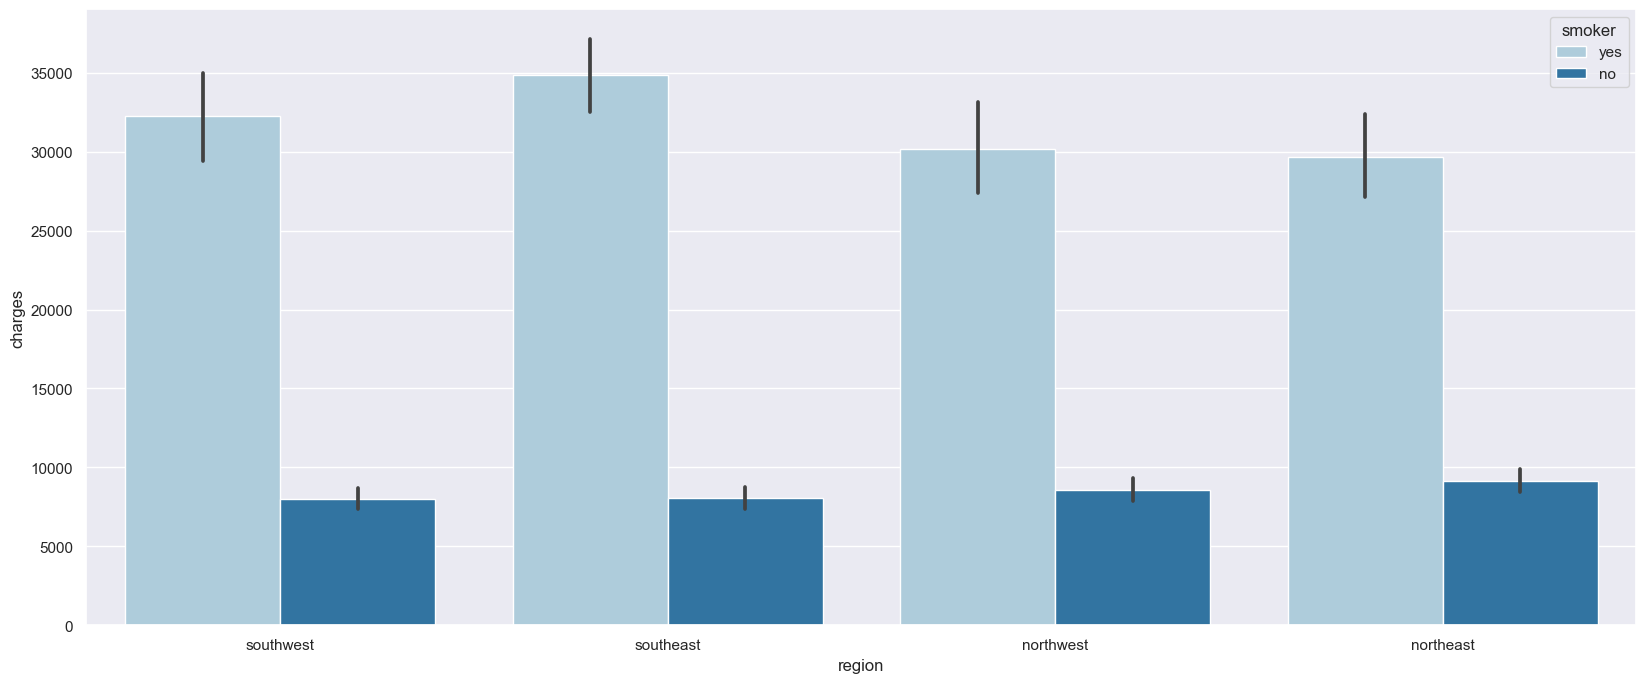

In [26]:
plt.subplots(1, 1, figsize = (20, 8))
sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = data, palette = 'Paired')
plt.show()

Observations: In contrast to the other factors, it appears that there is a statistically significant difference in how smoking behavior within a region impacts medical charges.

From these bar charts, it is evident that smoking behavior by region significantly affects medical charges. Now, let's examine the correlation between non-categorical variables (age, BMI, and children) and medical charges, considering smoking behavior as a factor.

Text(0.5, 1.0, 'Number of children vs Medical Charges')

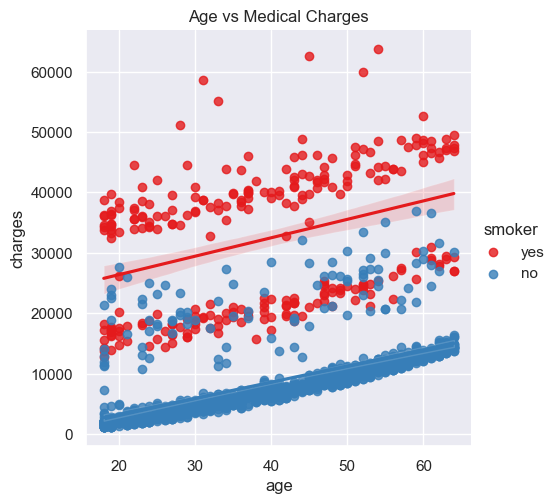

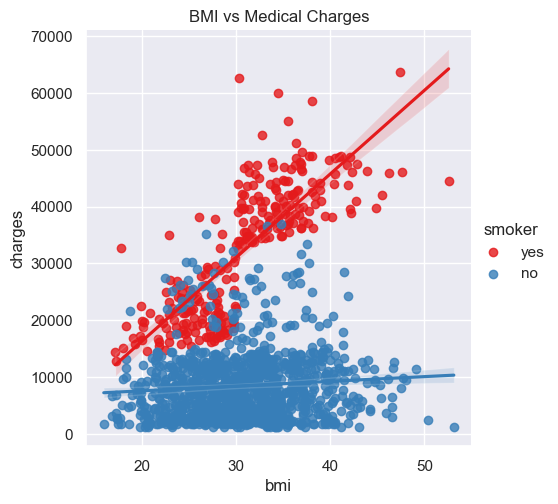

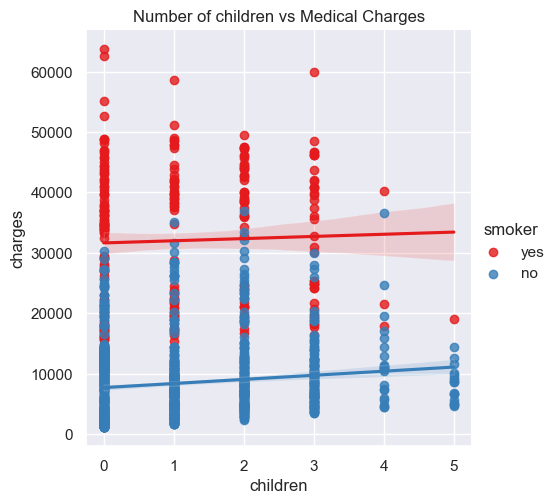

In [27]:
#Charges by age, bmi, and children based on smoking behavior

ax = sns.lmplot(x = 'age', y = 'charges', data = data, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = data, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = data, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

Observations: Based on the analysis, it's clear that smoking has a significant impact on medical costs. When combined with other factors such as age, BMI, and the number of children, the effect of smoking on medical costs becomes even more pronounced and leads to higher medical expenses. In other words, smoking, when considered alongside these factors, contributes to increased medical costs.

# Encoding the categorical features

In [30]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(data.region)
data.region = label.transform(data.region)

label.fit(data.sex)
data.sex = label.transform(data.sex)

label.fit(data.smoker)
data.smoker = label.transform(data.smoker)

data.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Observations : We have converted all the categorical columns in numeric

# Multivariate Analysis

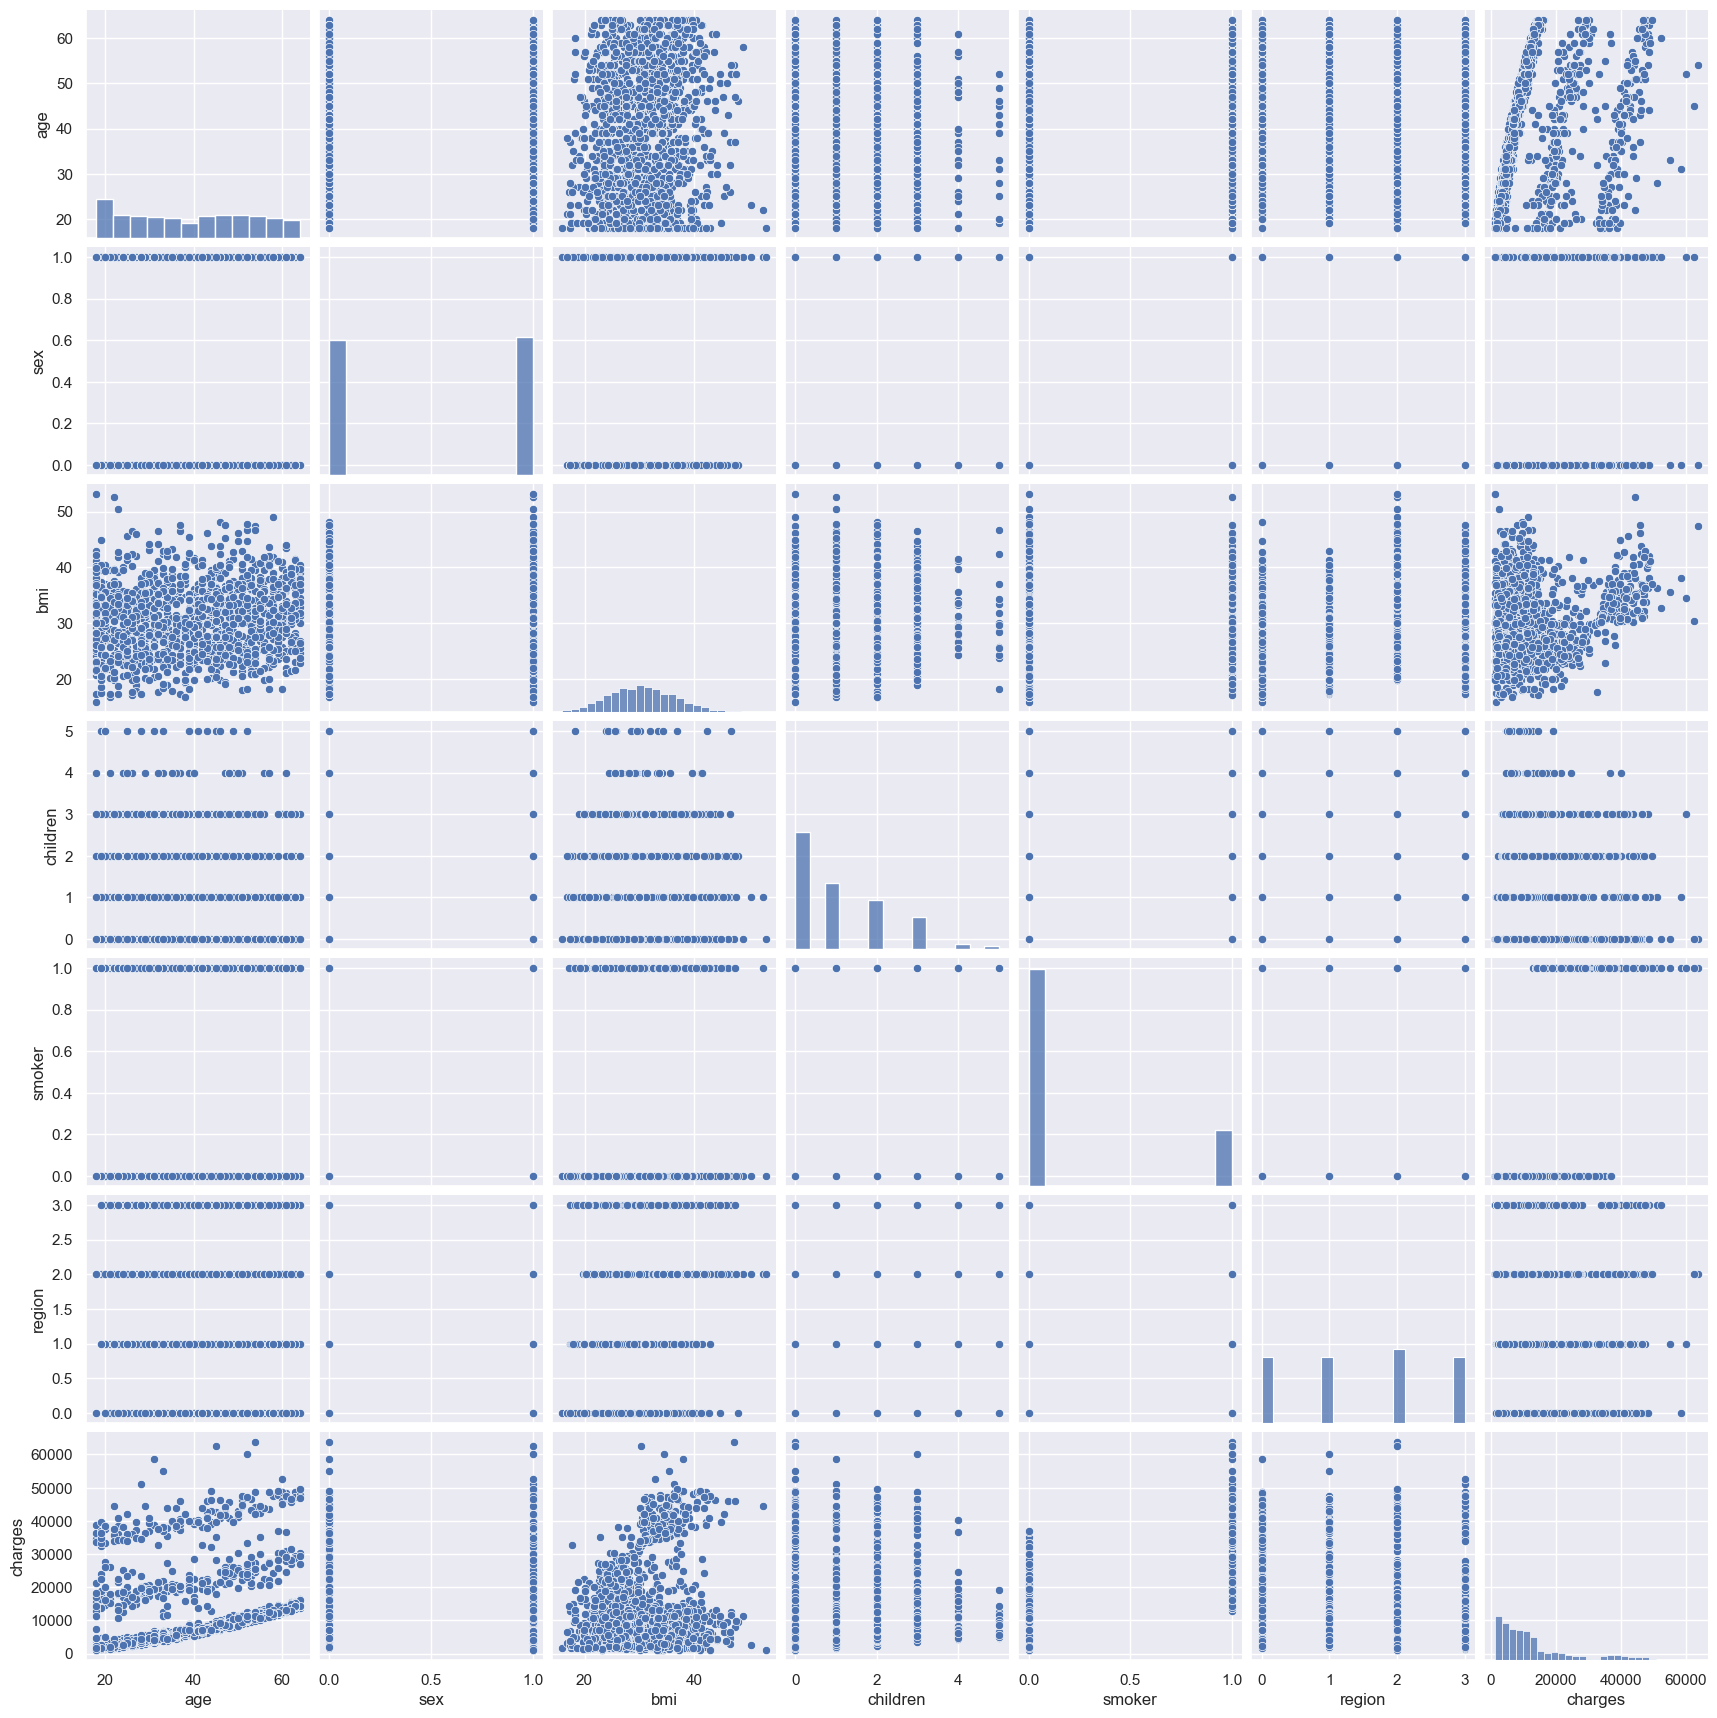

In [32]:
sns.pairplot(data, palette ='hot_r')
plt.show()

# Correlation between target variables & independent variables

In [34]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


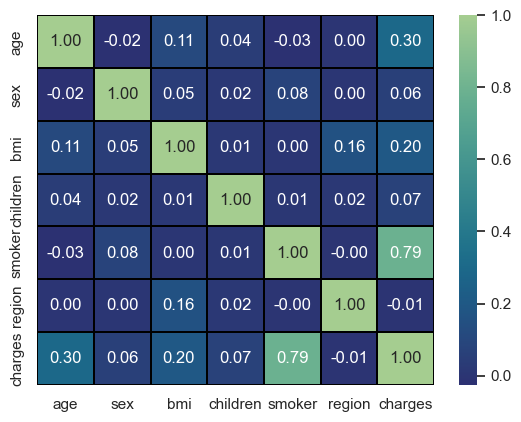

In [35]:
sns.heatmap(data.corr(),annot=True, fmt='0.2f',linewidth=0.2, linecolor='black',cmap="crest_r")
plt.show()

In [36]:
data.corr().charges.sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

# Visualizing the correlation between label & features using bar plot

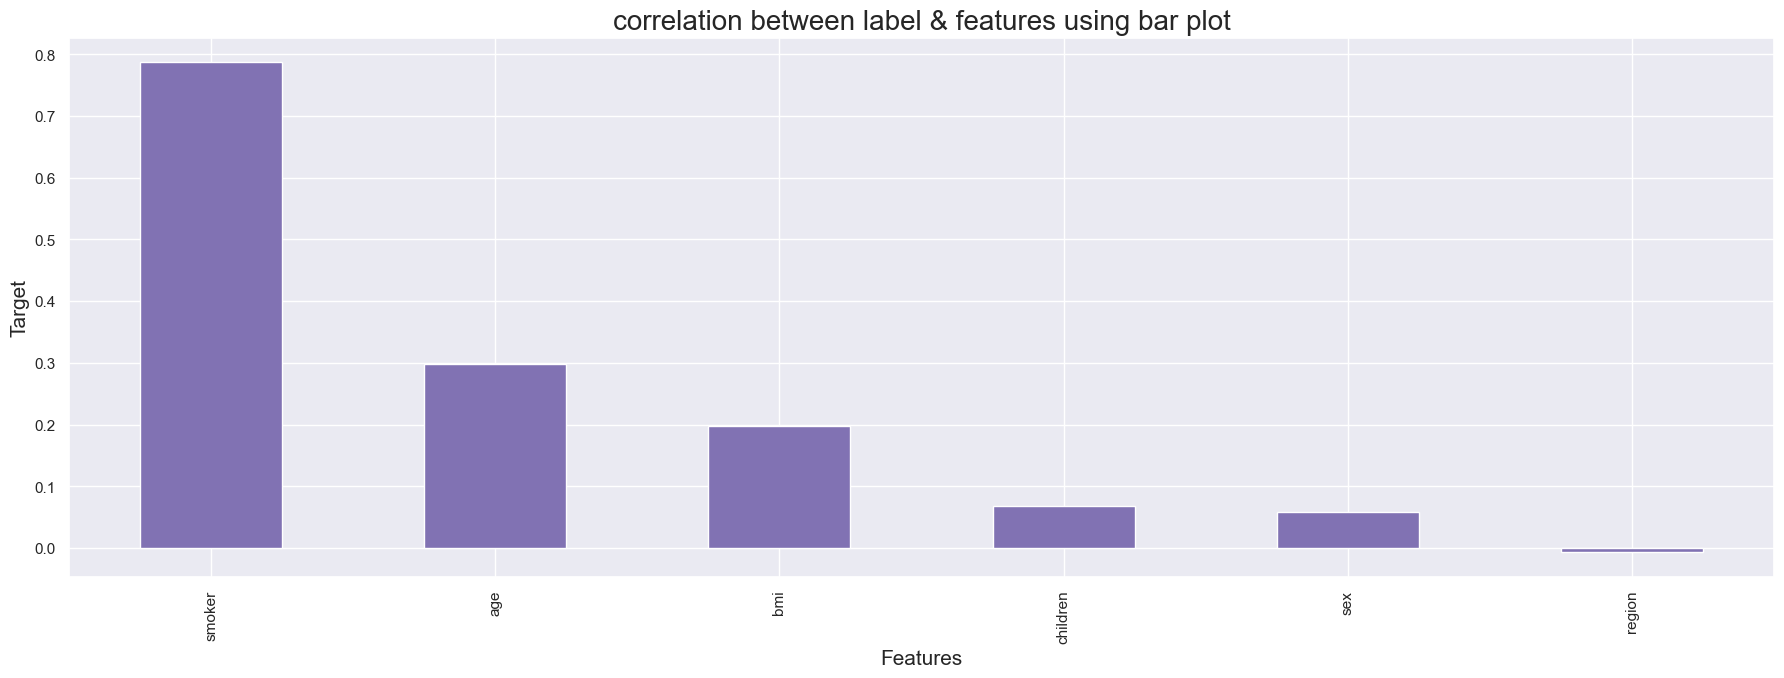

In [37]:
plt.figure(figsize=(22,7))
data.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('correlation between label & features using bar plot', fontsize=20)
plt.show()

Observation : From the above barplot we can notice the positive correlationship between the features and the target. Here 'smoker' is positive correlation with our target , gradually it decrease to age than bmi and child, than sex and less correlation with region.

# Separating Features & Labels

In [38]:
#separating independent and target variables into x and y
x=data.drop('charges', axis=1)
y=data['charges']

print("Feature Dimension ", x.shape)
print("Label Dimension", y.shape)

Feature Dimension  (1337, 6)
Label Dimension (1337,)


We have scaled the data using Standard Scalarized method to overcome the issue of biasness.

In [39]:
#finding the best random state

#importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [40]:
#finding the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maimum r2 score is ', maxAccu, "Random_State ",maxRS)

Maimum r2 score is  0.8095751620376271 Random_State  11


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25, random_state=maxRS)
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

x_train : (1002, 6)
x_test : (335, 6)
y_train : (1002,)
y_test : (335,)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [43]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_LR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 Score:  0.8095751620376271
R2 on training Data:  73.14466579170875
Mean Absolute Error:  3758.9463608385954
Mean Squared Error:  25834546.641032375
Root Mean Squared Error:  5082.769583704575


In [44]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_RFR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 Score:  0.8733102399448016
R2 on training Data:  97.29350864277778
Mean Absolute Error:  2395.000027320372
Mean Squared Error:  17187739.530774593
Root Mean Squared Error:  4145.809876341967


In [45]:
KNN= KNN()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
pred_train=KNN.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_KNN))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_KNN))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_KNN))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2 Score:  0.1082367965286255
R2 on training Data:  40.762357520748694
Mean Absolute Error:  7828.773399776121
Mean Squared Error:  120983682.1675014
Root Mean Squared Error:  10999.258255332557


In [46]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_GBR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score:  0.9021119726679765
R2 on training Data:  89.6512123733554
Mean Absolute Error:  2231.998710617618
Mean Squared Error:  13280267.609877203
Root Mean Squared Error:  3644.210148972916


In [47]:
lasso= Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_lasso))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score:  0.8095755153106238
R2 on training Data:  73.14465723752146
Mean Absolute Error:  3759.389643549798
Mean Squared Error:  25834498.71321053
Root Mean Squared Error:  5082.764868967532


In [48]:
ridge= Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_ridge))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_ridge))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score:  0.8091990653200128
R2 on training Data:  73.14242689385839
Mean Absolute Error:  3772.7274885336424
Mean Squared Error:  25885570.910222866
Root Mean Squared Error:  5087.7864450292


In [49]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_DTR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 Score:  0.6740505129374166
R2 on training Data:  99.87795868900035
Mean Absolute Error:  3072.7561098477618
Mean Squared Error:  44220897.422020115
Root Mean Squared Error:  6649.879504323377


In [50]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_svr))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score:  -0.0558537065410194
R2 on training Data:  -10.663314922990551
Mean Absolute Error:  7897.660732821093
Mean Squared Error:  143245503.68335247
Root Mean Squared Error:  11968.521365789196


In [51]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_etr))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score:  0.8637492234207652
R2 on training Data:  99.87795868900035
Mean Absolute Error:  2247.271460109104
Mean Squared Error:  18484863.00462892
Root Mean Squared Error:  4299.40263346304


# Cross Validation Score

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
score =cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_LR)-score.mean())*100)

[0.76123487 0.70840689 0.77720769 0.73365562 0.7551376 ]
0.7471285330088384
Difference between R2 Score & Cross Validation Score:  6.244662902878872


In [54]:
score =cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_RFR)-score.mean())*100)

[0.85379681 0.77668057 0.87218449 0.82779143 0.85053878]
0.8361984172780431
Difference between R2 Score & Cross Validation Score:  3.71118226667585


In [55]:
score =cross_val_score(KNN,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_KNN)-score.mean())*100)

[0.14668553 0.03658099 0.03172295 0.13957399 0.16316057]
0.10354480529055962
Difference between R2 Score & Cross Validation Score:  0.4691991238065879


In [56]:
score =cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_GBR)-score.mean())*100)

[0.87439909 0.79922506 0.89374699 0.85030935 0.86052967]
0.8556420344211022
Difference between R2 Score & Cross Validation Score:  4.646993824687429


In [57]:
score =cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_lasso)-score.mean())*100)

[0.76125678 0.70843568 0.77718717 0.73366564 0.7551367 ]
0.7471363933595828
Difference between R2 Score & Cross Validation Score:  6.2439121951040955


In [58]:
score =cross_val_score(ridge,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_ridge)-score.mean())*100)

[0.76139416 0.70872916 0.77656529 0.7340199  0.75488218]
0.7471181375337135
Difference between R2 Score & Cross Validation Score:  6.208092778629936


In [59]:
score =cross_val_score(DTR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_DTR)-score.mean())*100)

[0.76430701 0.66859649 0.71061816 0.7189077  0.69180832]
0.7108475389497864
Difference between R2 Score & Cross Validation Score:  -3.6797026012369782


In [60]:
score =cross_val_score(svr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_svr)-score.mean())*100)

[-0.11521827 -0.10975599 -0.08194453 -0.10398097 -0.10781598]
-0.10374314816465749
Difference between R2 Score & Cross Validation Score:  4.788944162363809


In [61]:
score =cross_val_score(etr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_etr)-score.mean())*100)

[0.83611296 0.74430626 0.85304863 0.81407243 0.84431433]
0.818370921224972
Difference between R2 Score & Cross Validation Score:  4.53783021957932


Observation: From the difference of both R2 & Cross validation score computed on R2 score we can conclude that Gradient Boosting Regressor is our best fitting & best performing model

# Saving The best model

In [62]:
import pickle
filename ="Medical_cost_insurance.pkl"
pickle.dump(GBR, open(filename, 'wb'))

In [63]:
#loading Model
load_model=pickle.load(open('Medical_cost_insurance.pkl','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

90.21119726679765


In [64]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
Predicted,35631.827377,5997.99314,8205.048588,5952.071914,10005.733549,12387.810493,6132.968415,15481.729105,14951.704759,14353.015517,...,5728.329701,18350.487824,6808.705132,3042.068478,49797.771082,10966.124074,17677.989345,8102.143473,7122.723895,7676.634711
Original,36397.576000,4415.15880,7639.417450,2304.002200,9563.029000,11454.021500,5012.471000,12648.703400,13462.520000,13974.455550,...,12404.879100,19444.265800,5385.337900,1880.070000,46661.442400,3481.868000,13405.390300,7077.189400,3537.703000,5708.867000
